# **OLS Models Improvement**

Problem: We have 6 datasets, please:

- Create a scatter plot and visually decide if a linear model is appropriate (a matrix scatter plot will would be most efficient).

* If the relation is not linear, transform the data accordingly.
 - Try logarithm, exponential, square root, square, etc., for Y and/or X until you see a linear relation.  You only need to report what is the transformation chosen, not all the attempts.
 Note:  most of the time, you can guess visually. A systematic way is to create a matrix scatter plot of the different transformations.  A generic way we did not cover is to use a Box-Cox transformation.

* Create an OLS model for the original and transformed data if required.
 - Evaluate if the OLS assumptions are met: normality of errors centered around zero, equal variance, etc..., for the original data and transformed data if appropriate.

 - Comment how the transformation impacted the different assumptions. (This should be done only by looking at the output diagnostic charts created by the software)
 - If datasets have outliers, remove the outliers and see the effect in the model (slope, intercept and R-square)


# **Import Libraries & Load the data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from scipy.stats import boxcox
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot

In [ ]:
df1 = pd.read_excel("https://github.com/LarryChenCode/uwaterloo/raw/main/set1.xlsx")
df2 = pd.read_excel("https://github.com/LarryChenCode/uwaterloo/raw/main/set2.xlsx")
df3 = pd.read_excel("https://github.com/LarryChenCode/uwaterloo/raw/main/set3.xlsx")
df4 = pd.read_excel("https://github.com/LarryChenCode/uwaterloo/raw/main/set4.xlsx")
df5 = pd.read_excel("https://github.com/LarryChenCode/uwaterloo/raw/main/set5.xlsx")
df6 = pd.read_excel("https://github.com/LarryChenCode/uwaterloo/raw/main/set6.xlsx")

# **Set 1**

**Conclusion:**



*   Linear regression Model: We have estimated the intercept ( 𝛽0 ) to be approximately 0.24, and the slope ( 𝛽1 ) to be approximately 4.98. Thus, the equation for predicting y from the x can be written as:

$$\text{y} = 0.24 + 4.98 \cdot \text{x}$$

*   Comment: The linear assumptions were met for the original dataset without any transformation. Also, by checking the outliers/leverages, we don't see any outlier.

*   In the linear regression model, the intercept indicates that the dependent variable (y) will increase by 0.24 units when the independent variable (x) is zero. The slope suggests that for each one-unit increase in the independent variable (x), the dependent variable (y) will increase by 4.98 units.

**Calculation, Code, OLS Model, and Plot:**

In [ ]:
# Print the first 5 rows of the dataset
df1.head()

,y,x
0,38.858144,7.266278
1,40.891148,7.985333
2,48.971648,9.387120
3,46.410124,9.382849
4,25.333391,5.240903


In [ ]:
# Print the information of the dataset
df1.describe()

,y,x
count,100.000000,100.000000
mean,29.193214,5.809318
std,13.186232,2.617712
min,6.288716,1.163897
25%,18.414725,3.873405
50%,27.597232,5.586470
75%,40.879564,7.996223
max,50.887917,9.910843


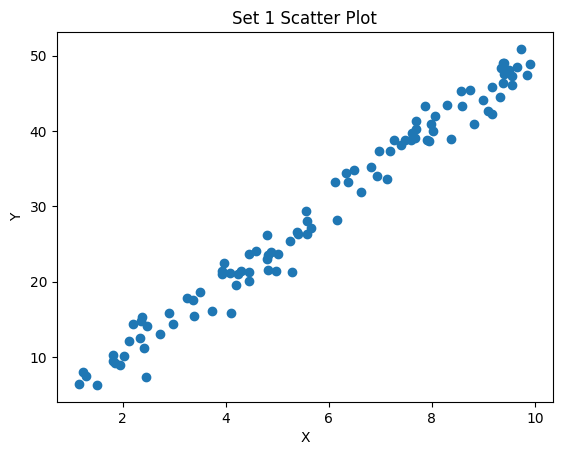

In [ ]:
# Plot the dataset
X1 = df1.x
Y1 = df1.y

plt.scatter(X1, Y1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Set 1 Scatter Plot')
plt.show()

In [ ]:
# Run the regression
result1 = sm.ols(formula='Y1 ~ X1', data=df1).fit()

# Show the results
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y1   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4579.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           4.47e-84
Time:                        02:51:47   Log-Likelihood:                -206.03
No. Observations:                 100   AIC:                             416.1
Df Residuals:                      98   BIC:                             421.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2381      0.469      0.508      0.613      -0.693       1.169
X1             4.9843      0.074     67.669      0.000       4.838       5.130
==============================================================================
Omnibus:                        4.971   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.783
Skew:                          -0.536   Prob(JB):                       0.0915
Kurtosis:                       2.988   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
result1.params

Intercept    0.238070
X1           4.984259
dtype: float64

In [ ]:
intercept1, slope1 = result1.params
df1['y_est'] = intercept1 + slope1 * X1

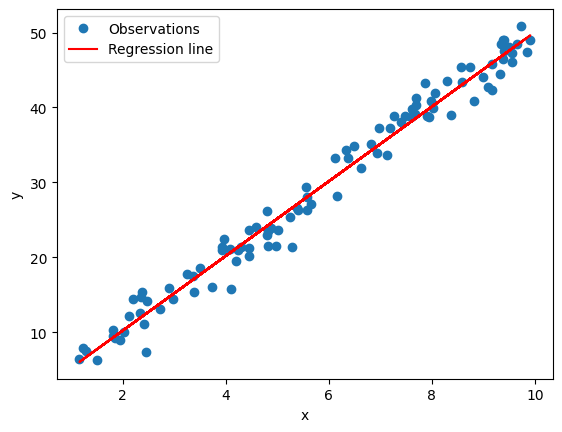

In [ ]:
# As you may notice, all the estimates lie on the line;
# this is the regression line

plt.plot(X1, Y1, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')

# Plot regression line
plt.plot(X1, df1.y_est, 'r-', label='Regression line')

# Add legend
plt.legend()
plt.show()

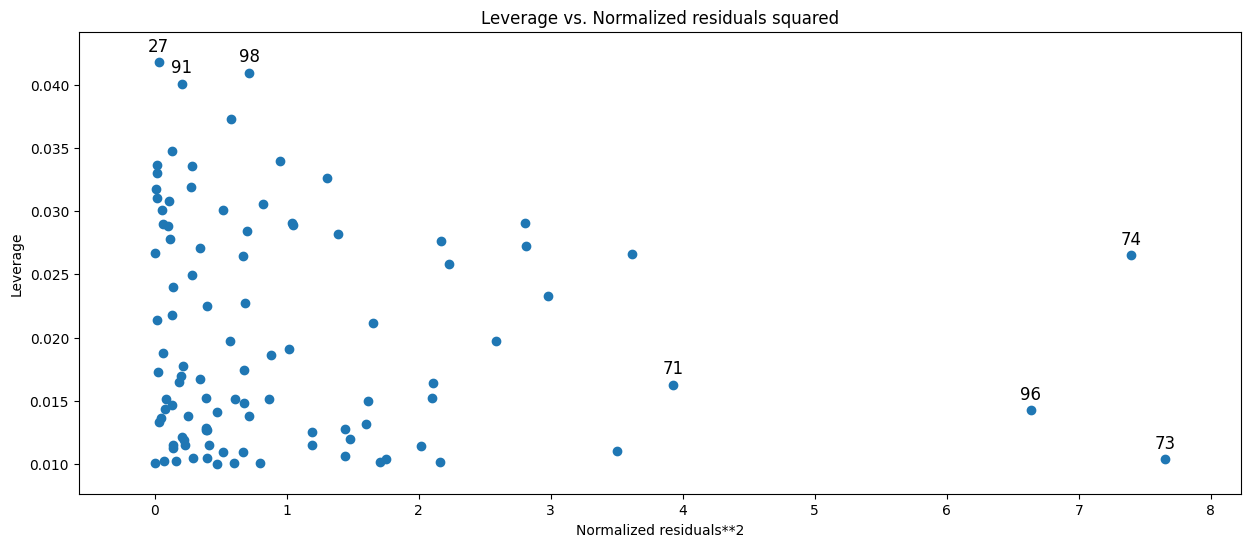

In [ ]:
fig,ax = plt.subplots(figsize=(15,6))
fig = plot_leverage_resid2(result1, ax=ax)

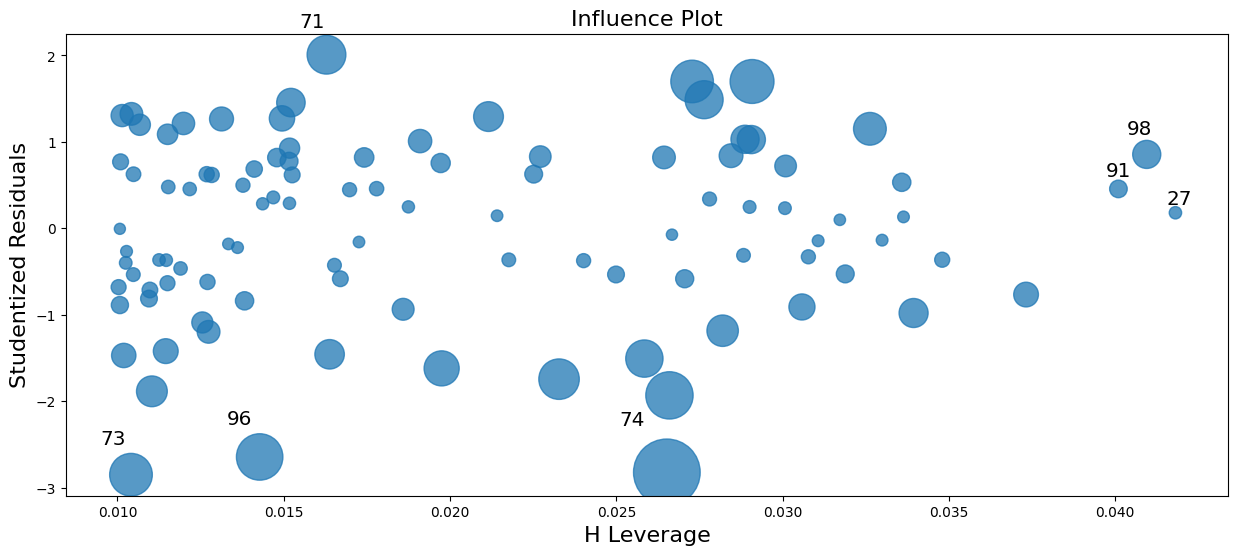

In [ ]:
fig,ax = plt.subplots(figsize= (15,6))
fig = influence_plot(result1, ax=ax)

--> No outlier

# **Set 2**

**Conclusion:**



*   Linear regression Model: We have estimated the intercept ( 𝛽0 ) to be approximately 1.10, and the slope ( 𝛽1 ) to be approximately 4.78. Thus, the equation for predicting y from the x can be written as:

$$\text{y} = 1.10 + 4.78 \cdot \text{x}$$

*   Comment: The linear assumptions were met for the original dataset without any transformation. Also, by checking the outliers/leverages, we don't see any outlier.

*   In the linear regression model, the intercept indicates that the dependent variable (y) will increase by 1.10 units when the independent variable (x) is zero. The slope suggests that for each one-unit increase in the independent variable (x), the dependent variable (y) will increase by 4.78 units.

**Calculation, Code, OLS Model, and Plot:**

In [ ]:
df2.head()

,y,x
0,28.045621,4.299210
1,39.148284,4.528143
2,17.361044,3.284988
3,18.413561,5.709732
4,7.857464,3.242708


In [ ]:
df2.describe()

,y,x
count,100.000000,100.000000
mean,26.774707,5.375184
std,15.620390,2.436456
min,-11.689840,1.123026
25%,16.281715,3.373599
50%,29.023364,5.012631
75%,37.267332,7.513979
max,63.932898,9.784536


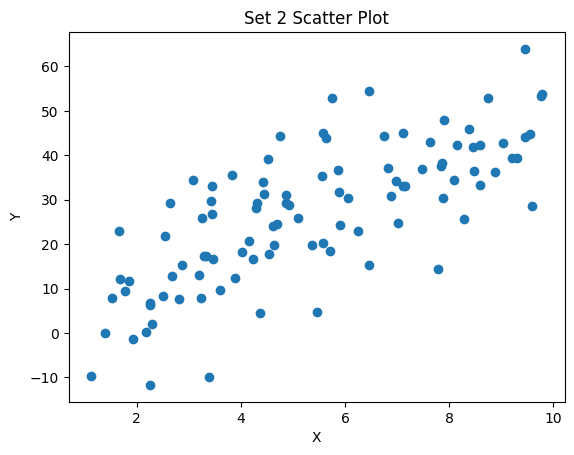

In [ ]:
X2 = df2.x
Y2 = df2.y

plt.scatter(X2, Y2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Set 2 Scatter Plot')
plt.show()

In [ ]:
# Run the regression
result2 = sm.ols(formula='Y2 ~ X2', data=df2).fit()

# Show the results
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y2   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     122.4
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           6.11e-19
Time:                        02:51:48   Log-Likelihood:                -375.73
No. Observations:                 100   AIC:                             755.5
Df Residuals:                      98   BIC:                             760.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0956      2.547      0.430      0.668      -3.958       6.149
X2             4.7774      0.432     11.062      0.000       3.920       5.634
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.079
Skew:                          -0.065   Prob(JB):                        0.961
Kurtosis:                       3.045   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
result2.params

Intercept    1.095552
X2           4.777354
dtype: float64

In [ ]:
intercept2, slope2 = result2.params
df2['y_est'] = intercept2 + slope2 * X2

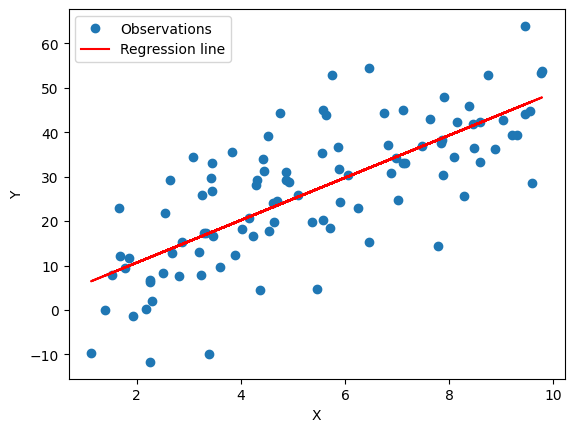

In [ ]:
# As you may notice, all the estimates lie on the line;
# this is the regression line

plt.plot(X2, Y2, 'o', label = 'Observations')
plt.xlabel('X')
plt.ylabel('Y')

# Plot regression line
plt.plot(X2, df2.y_est, 'r-', label='Regression line')

# Add legend
plt.legend()
plt.show()

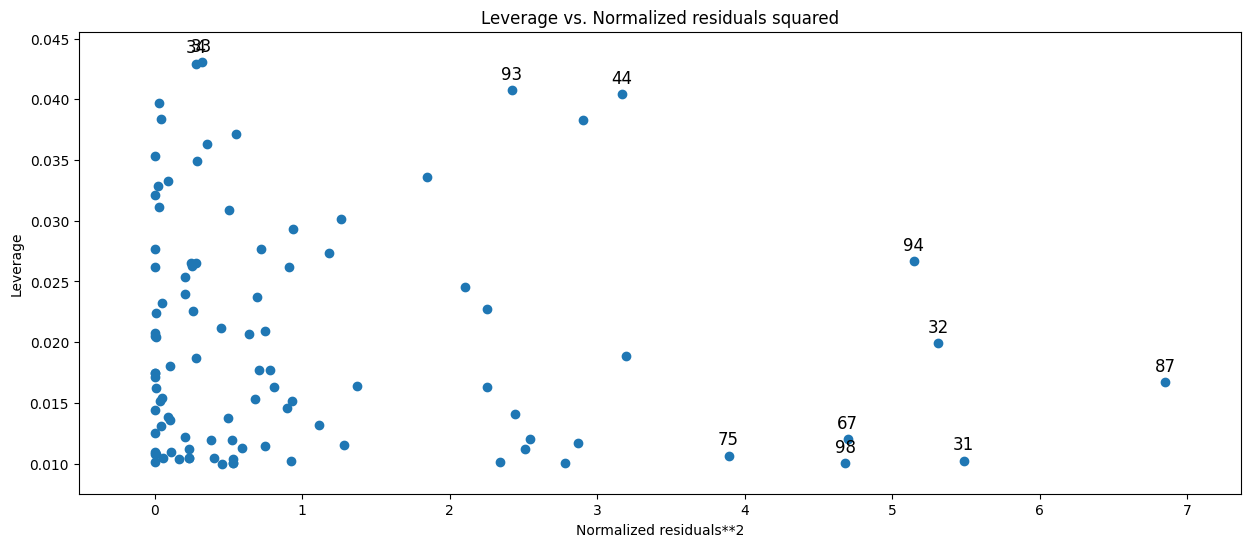

In [ ]:
fig,ax = plt.subplots(figsize=(15,6))
fig = plot_leverage_resid2(result2, ax=ax)

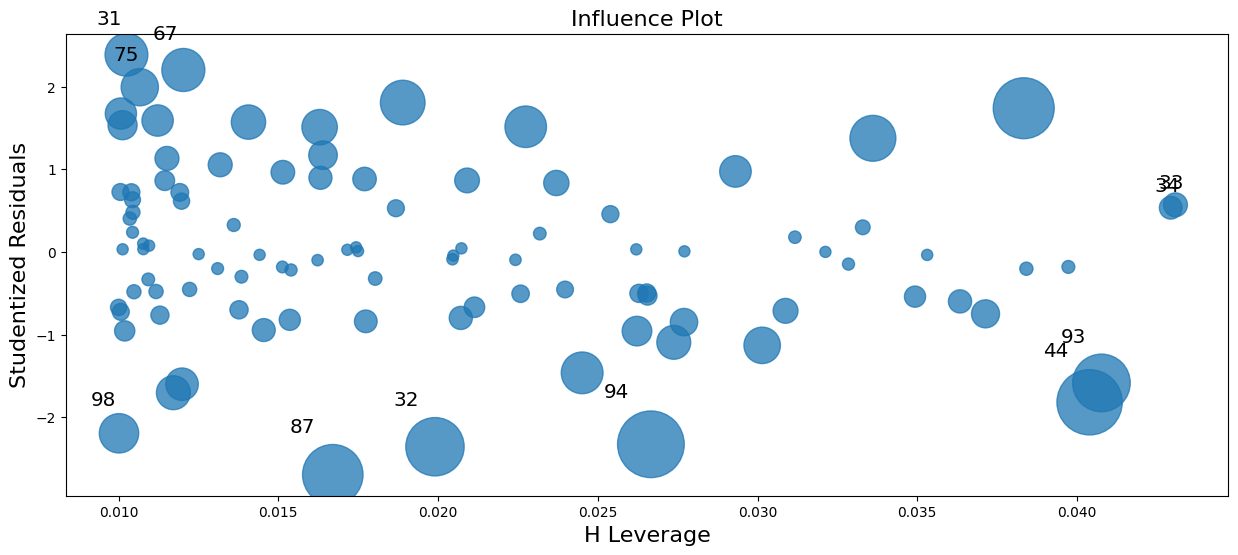

In [ ]:
fig,ax = plt.subplots(figsize= (15,6))
fig = influence_plot(result2, ax=ax)

--> No outlier

# **Set 3**

**Conclusion:**



*   Linear regression model: We have estimated the intercept (𝛽0) to be approximately 3.04, and the slope (𝛽1) to be approximately 1.99. Thus, the equation for predicting log(y) from the square root of x can be written as:

$$\text{log(y)} = 3.04 + 1.99 \cdot \text{square root of x}$$

*   Comment: The linear assumptions were not initially met for the original dataset. Consequently, I attempted different transformations until I found that using log(y) and square root of x resulted in a regression model that closely adheres to the linear assumptions. By applying these transformations, we were able to achieve a valid linear regression model for the data. Also, we don't see any outlier after transformation.

*   In the linear regression model, the intercept indicates that the dependent variable (log(y)) will increase by 3.04 units when the independent variable (square root of x) is zero. The slope suggests that for each one-unit increase in the independent variable (square root of x), the dependent variable (log(y)) will increase by 1.99 units.

**Calculation, Code, and Plot:**

In [ ]:
df3.head()

,Y,x
0,6428.915770,9.517
1,2640.000728,5.113
2,12858.599267,9.773
3,5491.450053,8.428
4,2838.820108,5.752


In [ ]:
df3.describe()

,Y,x
count,100.000000,100.000000
mean,3853.843519,5.999130
std,3042.522716,2.444058
min,85.816012,1.095000
25%,1255.307962,4.307500
50%,3190.568047,6.214000
75%,5633.938126,8.110000
max,13259.109970,9.958000


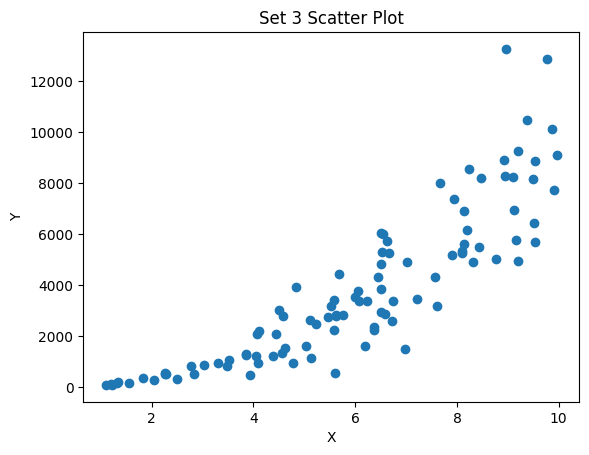

In [ ]:
X3 = df3.x
Y3 = df3.Y

plt.scatter(X3, Y3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Set 3 Scatter Plot')
plt.show()

Text(0.5, 1.0, 'Transformed Data: sqrt(X) vs. log(Y)')

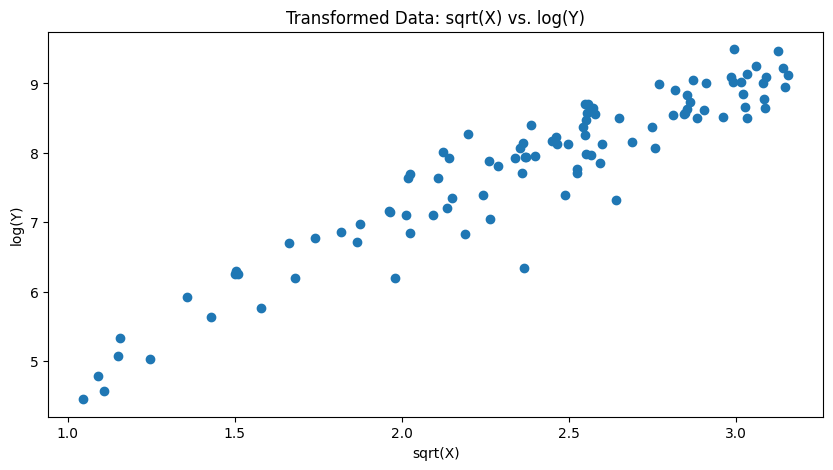

In [ ]:
# Logarithmic transformation on Y
df3['Y_log'] = np.log(Y3)

# Square root transformation on X
df3['X_sqrt'] = np.sqrt(X3)

# Create matrix scatter plot to visualize the transformed data
plt.figure(figsize=(10, 5))
plt.scatter(df3['X_sqrt'], df3['Y_log'])
plt.xlabel('sqrt(X)')
plt.ylabel('log(Y)')
plt.title('Transformed Data: sqrt(X) vs. log(Y)')

In [ ]:
Y3_mod = df3['Y_log']
X3_mod = df3['X_sqrt']

# Original OLS model
result3 = sm.ols(formula='Y3 ~ X3', data=df3).fit()

# Transformed OLS model with sqrt(X) and log(Y)
result3_mod = sm.ols(formula='Y3_mod ~ X3_mod', data=df3).fit()

# Print the model summaries
print("Original OLS Model:")
print(result3.summary())

print("\nTransformed OLS Model:")
print(result3_mod.summary())

Original OLS Model:
                            OLS Regression Results                            
Dep. Variable:                     Y3   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     302.4
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           1.04e-31
Time:                        02:51:52   Log-Likelihood:                -873.07
No. Observations:                 100   AIC:                             1750.
Df Residuals:                      98   BIC:                             1755.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2636.1748    402.741

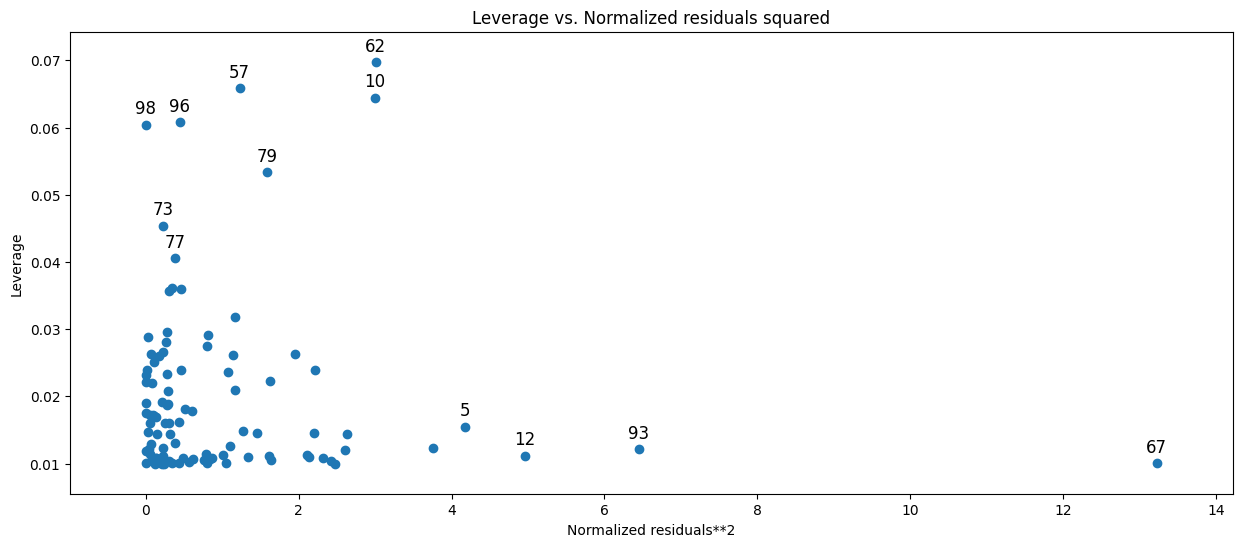

In [ ]:
fig,ax = plt.subplots(figsize=(15,6))
fig = plot_leverage_resid2(result3_mod, ax=ax)

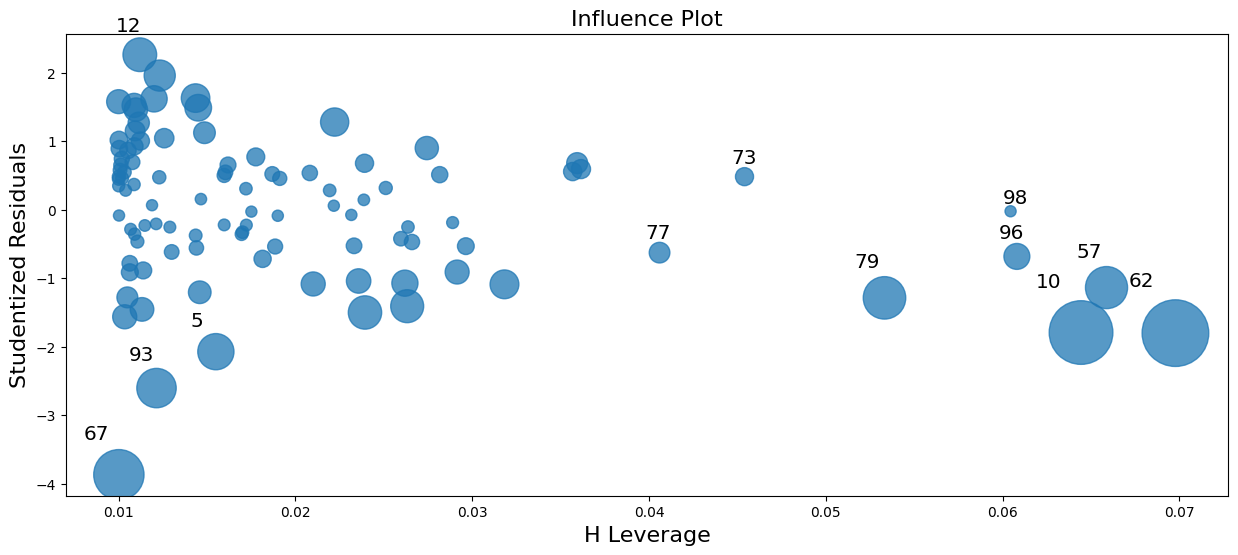

In [ ]:
fig,ax = plt.subplots(figsize= (15,6))
fig = influence_plot(result3_mod, ax=ax)

--> no outlier

In [ ]:
print("Original OLS Model:")
print(result3.params)

print("\nTransformed OLS Model:")
print(result3_mod.params)

Original OLS Model:
Intercept   -2636.174839
X3           1081.826591
dtype: float64

Transformed OLS Model:
Intercept    3.040242
X3_mod       1.990703
dtype: float64


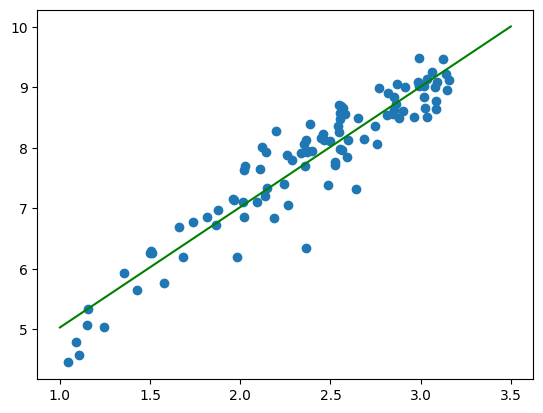

In [ ]:
t3 = np.linspace(1,3.5)
intercept_mod, slope_mod = result3_mod.params
plt.scatter(x=X3_mod, y=Y3_mod)
plt.plot(t3, intercept_mod + slope_mod *t3, 'g-')

# **Set 4**

**Conclusion:**



*   Linear regression model: We have estimated the intercept (𝛽0) to be approximately 5.66, and the slope (𝛽1) to be approximately 0.99. Thus, the equation for predicting log(y) from x can be written as:

$$\text{log(y)} = 5.66 + 0.99 \cdot \text{x}$$

*   Comment: The linear assumptions were not initially met for the original dataset. Consequently, I attempted different transformations until I found that using log(y) and x resulted in a regression model that closely adheres to the linear assumptions. By applying these transformations, we were able to achieve a valid linear regression model for the data. Also, we don't see any outlier after transformation.

*   In the linear regression model, the intercept indicates that the dependent variable (log(y)) will increase by 5.66 units when the independent variable (x) is zero. The slope suggests that for each one-unit increase in the independent variable (x), the dependent variable (log(y)) will increase by 0.99 units.

**Calculation, Code, and Plot:**

In [ ]:
df4.head()

,Y,x
0,1.887192e+05,5.9947
1,7.107264e+03,3.9492
2,3.729064e+06,9.6353
3,5.691779e+02,0.4943
4,3.022130e+06,9.0811


In [ ]:
df4.describe()

,Y,x
count,1.000000e+02,100.000000
mean,6.614429e+05,5.227871
std,1.311668e+06,2.986073
min,2.053452e+02,0.148800
25%,3.791669e+03,2.462475
50%,6.403172e+04,5.502350
75%,9.252337e+05,8.037525
max,8.240777e+06,9.897300


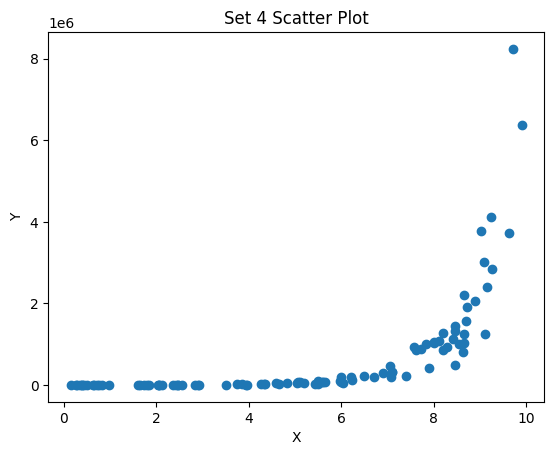

In [ ]:
Y4 = df4.Y
X4 = df4.x

plt.scatter(X4, Y4)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Set 4 Scatter Plot')
plt.show()

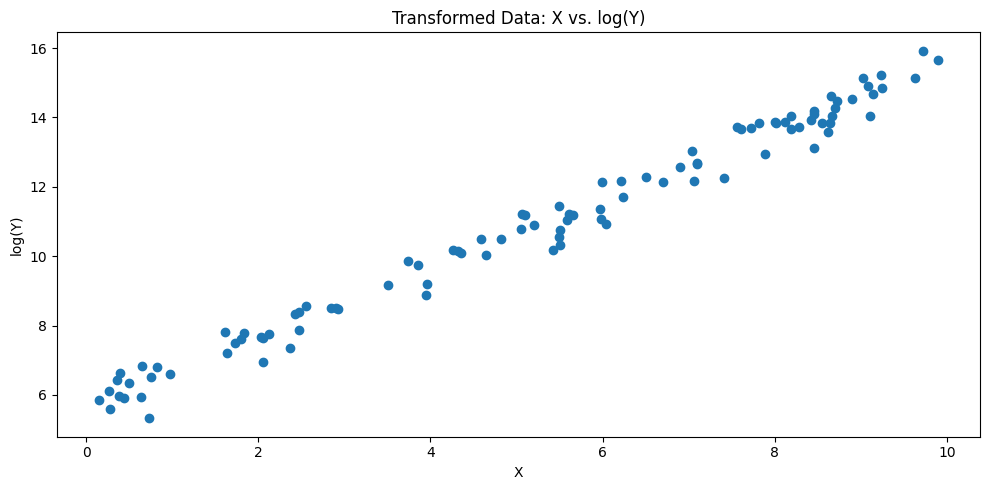

In [ ]:
# Logarithmic transformation on Y
df4['Y_log'] = np.log(Y4)

# Create matrix scatter plot to visualize the transformed data
plt.figure(figsize=(10, 5))
plt.scatter(X4, df4['Y_log'])
plt.xlabel('X')
plt.ylabel('log(Y)')
plt.title('Transformed Data: X vs. log(Y)')
plt.tight_layout()
plt.show()

In [ ]:
Y4_mod = df4['Y_log']

# Original OLS model
result4 = sm.ols(formula='Y4 ~ X4', data=df4).fit()

# Transformed OLS model with sqrt(X) and log(Y)
result4_mod = sm.ols(formula='Y4_mod ~ X4', data=df4).fit()

# Print the model summaries
print("Original OLS Model:")
print(result4.summary())

print("\nTransformed OLS Model:")
print(result4_mod.summary())

Original OLS Model:
                            OLS Regression Results                            
Dep. Variable:                     Y4   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     59.97
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           8.87e-12
Time:                        02:51:54   Log-Likelihood:                -1526.2
No. Observations:                 100   AIC:                             3056.
Df Residuals:                      98   BIC:                             3062.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.535e+05    2.1e+05

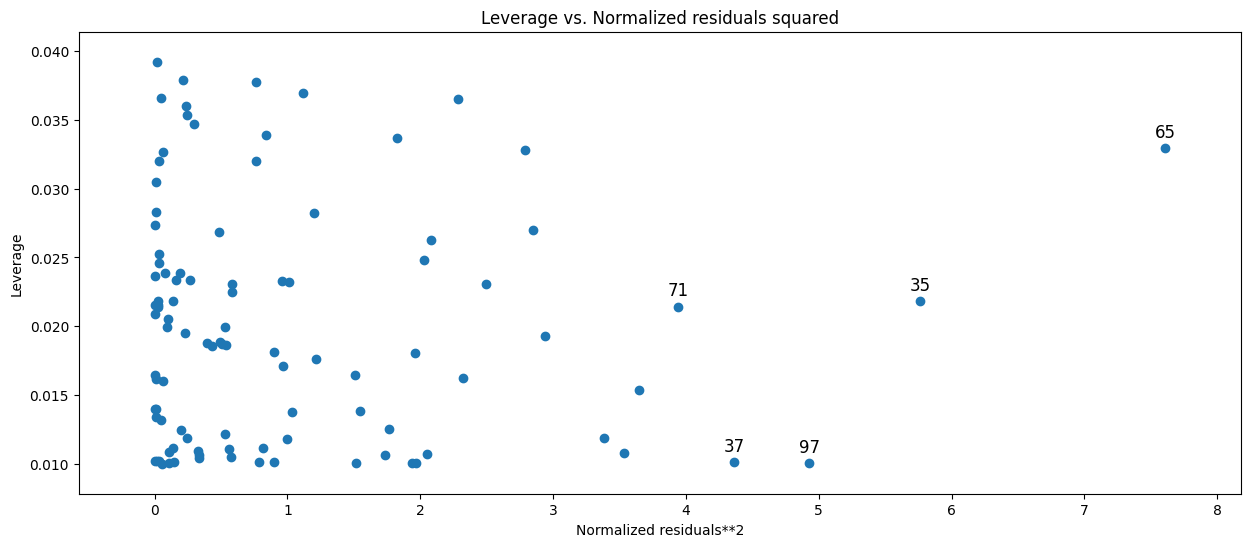

In [ ]:
fig,ax = plt.subplots(figsize=(15,6))
fig = plot_leverage_resid2(result4_mod, ax=ax)

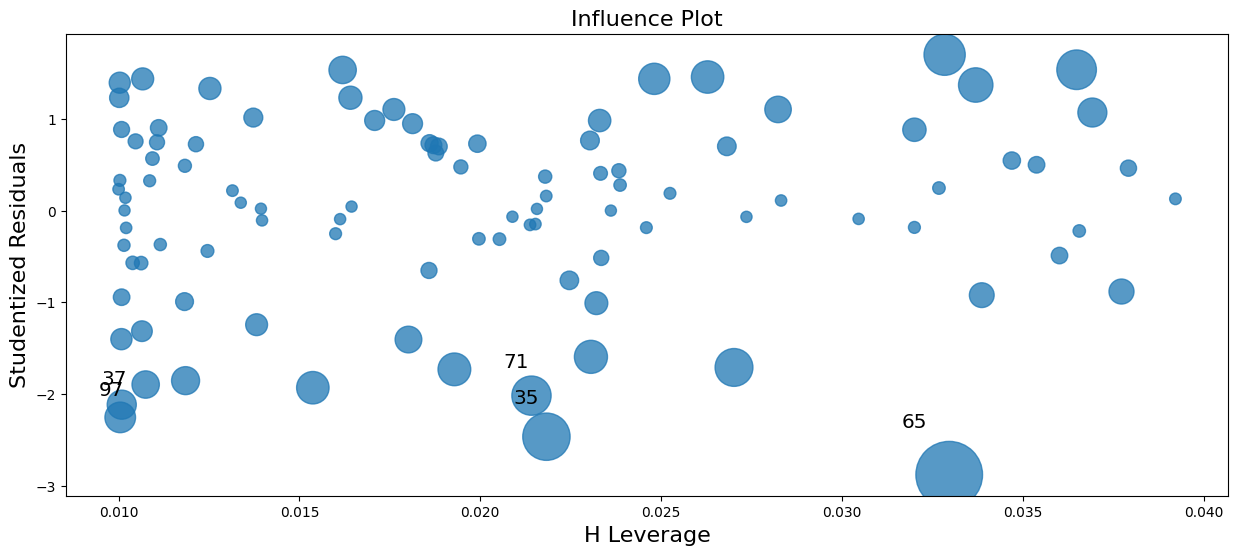

In [ ]:
fig,ax = plt.subplots(figsize= (15,6))
fig = influence_plot(result4_mod, ax=ax)

--> no outlier

In [ ]:
print("Original OLS Model:")
print(result4.params)

print("\nTransformed OLS Model:")
print(result4_mod.params)

Original OLS Model:
Intercept   -753498.668130
X4           270653.490062
dtype: float64

Transformed OLS Model:
Intercept    5.664722
X4           0.989848
dtype: float64


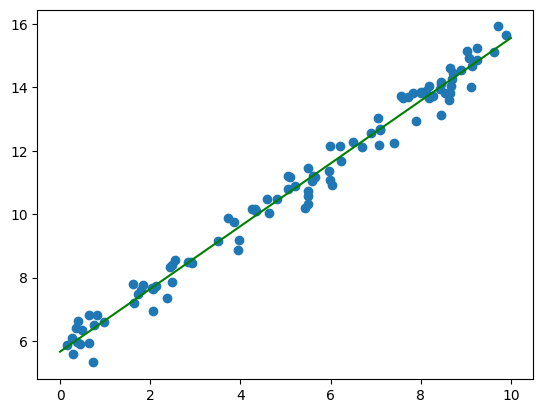

In [ ]:
t4 = np.linspace(0,10)
intercept_mod, slope_mod = result4_mod.params
plt.scatter(x=X4, y=Y4_mod)
plt.plot(t4, intercept_mod + slope_mod *t4, 'g-')

# **Set 5**

**Conclusion:**



*   Linear regression Model: We have estimated the intercept ( 𝛽0 ) to be approximately -0.67, and the slope ( 𝛽1 ) to be approximately 5.16. Thus, the equation for predicting y from the x can be written as:

$$\text{y} = -0.67 + 5.16 \cdot \text{x}$$

*   Comment: The linear assumptions were met for the original dataset after removing 2 outliers (No.59 and 101).

*   In the linear regression model, the intercept indicates that the dependent variable (y) will decrease by 0.67 units when the independent variable (x) is zero. The slope suggests that for each one-unit increase in the independent variable (x), the dependent variable (y) will increase by 5.16 units.

**Calculation, Code, and Plot:**

In [ ]:
df5

,Y,X
0,47.320319,9.05270
1,39.862491,7.31350
2,42.225779,8.64710
3,30.010689,5.85790
4,43.900459,7.93570
...,...,...
96,1.027913,0.94690
97,33.965305,8.41480
98,39.077962,6.66190
99,48.254626,9.51610


In [ ]:
df5.describe()

,Y,X
count,101.000000,101.000000
mean,24.640736,4.975682
std,15.143420,2.852301
min,-4.448560,0.169400
25%,12.535342,2.314200
50%,25.659742,5.003200
75%,39.077962,7.460200
max,52.839325,9.970710


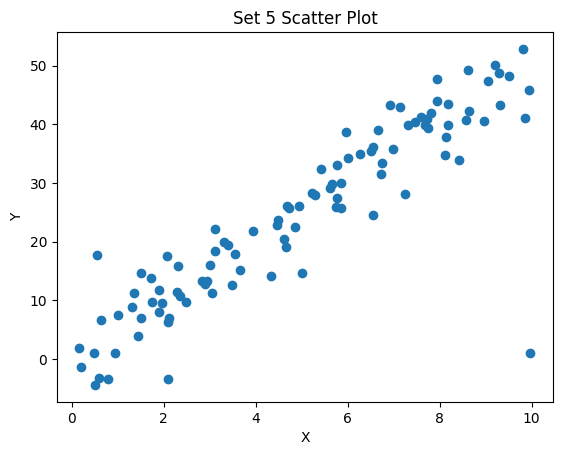

In [ ]:
Y5 = df5.Y
X5 = df5.X

plt.scatter(X5, Y5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Set 5 Scatter Plot')
plt.show()

In [ ]:
# Run the regression
result5 = sm.ols(formula='Y5 ~ X5', data=df5).fit()

# Show the results
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y5   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     411.9
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           4.70e-37
Time:                        02:51:56   Log-Likelihood:                -334.42
No. Observations:                 101   AIC:                             672.8
Df Residuals:                      99   BIC:                             678.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9213      1.346      0.685      0.495      -1.749       3.591
X5             4.7671      0.235     20.294      0.000       4.301       5.233
==============================================================================
Omnibus:                      113.783   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2578.951
Skew:                          -3.591   Prob(JB):                         0.00
Kurtosis:                      26.691   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

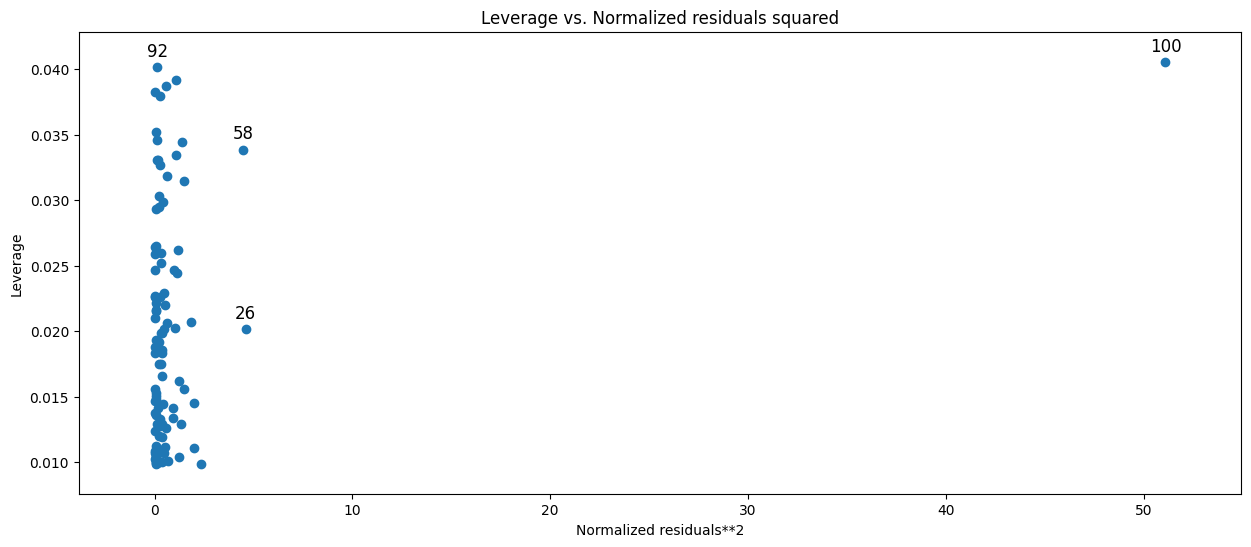

In [ ]:
fig,ax = plt.subplots(figsize=(15,6))
fig = plot_leverage_resid2(result5, ax=ax)

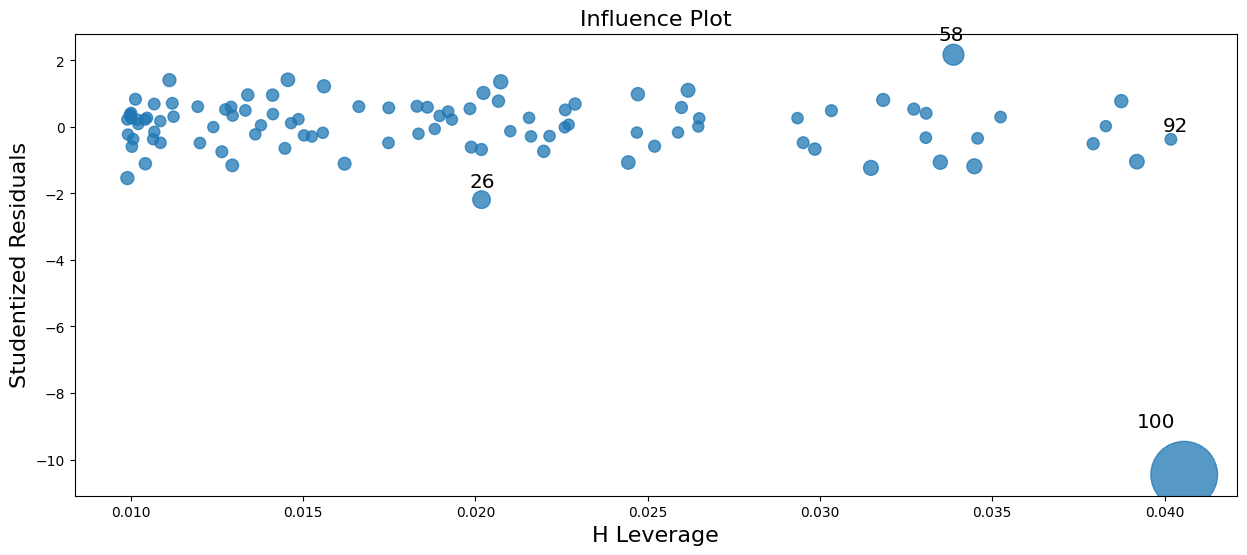

In [ ]:
fig,ax = plt.subplots(figsize= (15,6))
fig = influence_plot(result5, ax=ax)

--> remove 100

In [ ]:
df5.drop(df5.index[100], inplace=True)
df5

,Y,X
0,47.320319,9.0527
1,39.862491,7.3135
2,42.225779,8.6471
3,30.010689,5.8579
4,43.900459,7.9357
...,...,...
95,34.299702,6.0058
96,1.027913,0.9469
97,33.965305,8.4148
98,39.077962,6.6619


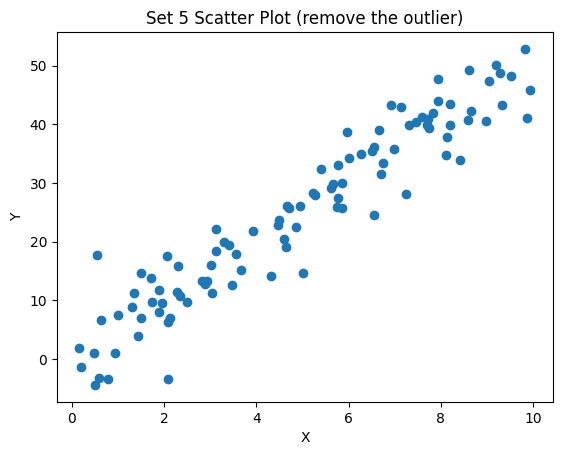

In [ ]:
Y5 = df5.Y
X5 = df5.X

plt.scatter(X5, Y5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Set 5 Scatter Plot (remove the outlier)')
plt.show()

In [ ]:
# Run the regression
result5 = sm.ols(formula='Y5 ~ X5', data=df5).fit()

# Show the results
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y5   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     945.8
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           3.84e-52
Time:                        02:51:58   Log-Likelihood:                -294.13
No. Observations:                 100   AIC:                             592.3
Df Residuals:                      98   BIC:                             597.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0993      0.935     -0.106      0.916      -1.954       1.756
X5             5.0705      0.165     30.753      0.000       4.743       5.398
==============================================================================
Omnibus:                        3.022   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                2.760
Skew:                          -0.158   Prob(JB):                        0.252
Kurtosis:                       3.750   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

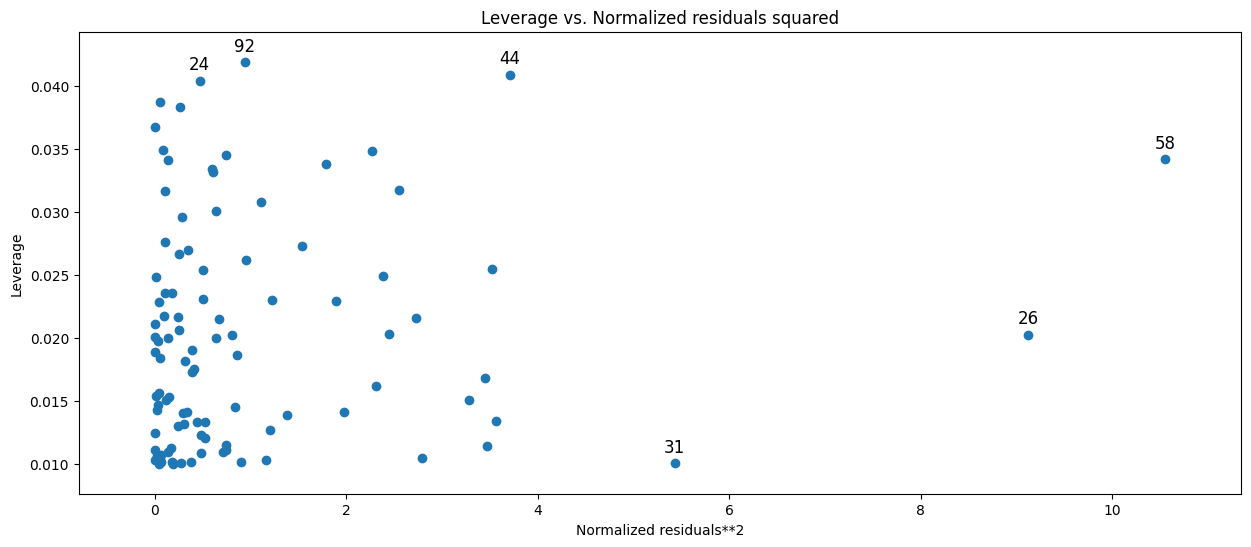

In [ ]:
fig,ax = plt.subplots(figsize=(15,6))
fig = plot_leverage_resid2(result5, ax=ax)

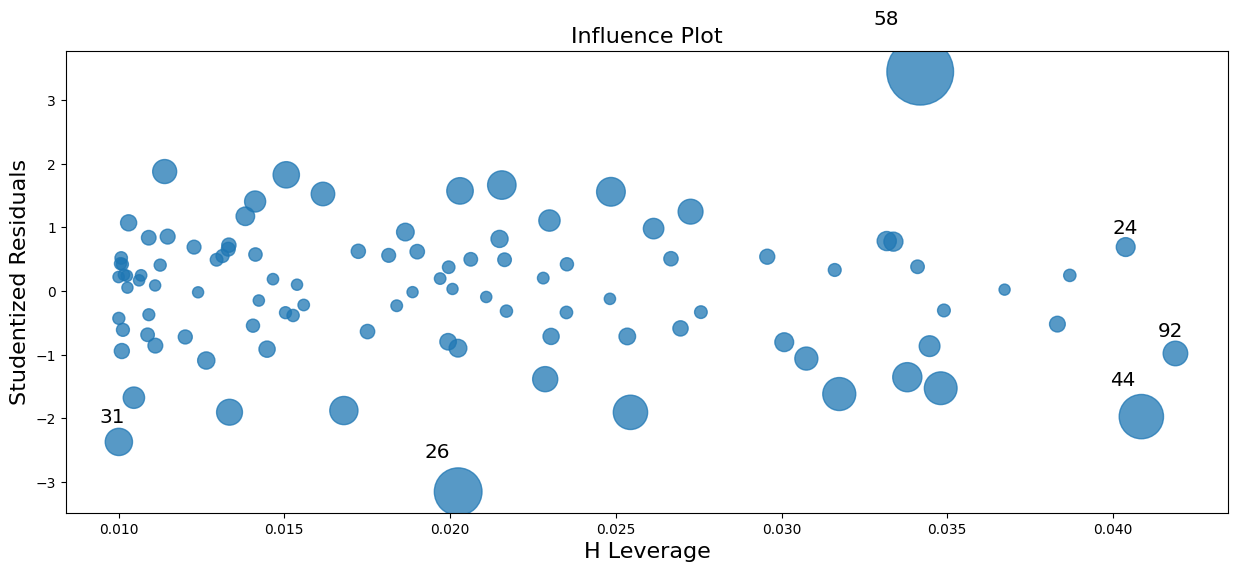

In [ ]:
fig,ax = plt.subplots(figsize= (15,6))
fig = influence_plot(result5, ax=ax)

--> remove 58

In [ ]:
df5.drop(df5.index[58], inplace=True)
df5

,Y,X
0,47.320319,9.0527
1,39.862491,7.3135
2,42.225779,8.6471
3,30.010689,5.8579
4,43.900459,7.9357
...,...,...
95,34.299702,6.0058
96,1.027913,0.9469
97,33.965305,8.4148
98,39.077962,6.6619


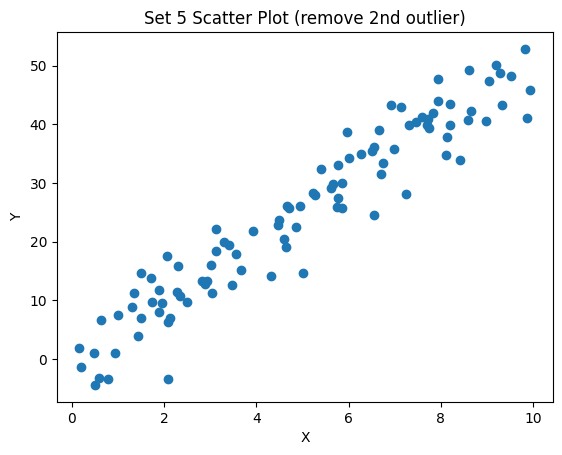

In [ ]:
Y5 = df5.Y
X5 = df5.X

plt.scatter(X5, Y5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Set 5 Scatter Plot (remove 2nd outlier)')
plt.show()

In [ ]:
# Run the regression
result5 = sm.ols(formula='Y5 ~ X5', data=df5).fit()

# Show the results
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y5   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1060.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           5.14e-54
Time:                        02:51:59   Log-Likelihood:                -285.95
No. Observations:                  99   AIC:                             575.9
Df Residuals:                      97   BIC:                             581.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6740      0.902     -0.747      0.457      -2.465       1.117
X5             5.1559      0.158     32.559      0.000       4.842       5.470
==============================================================================
Omnibus:                        4.670   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                4.167
Skew:                          -0.494   Prob(JB):                        0.125
Kurtosis:                       3.189   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

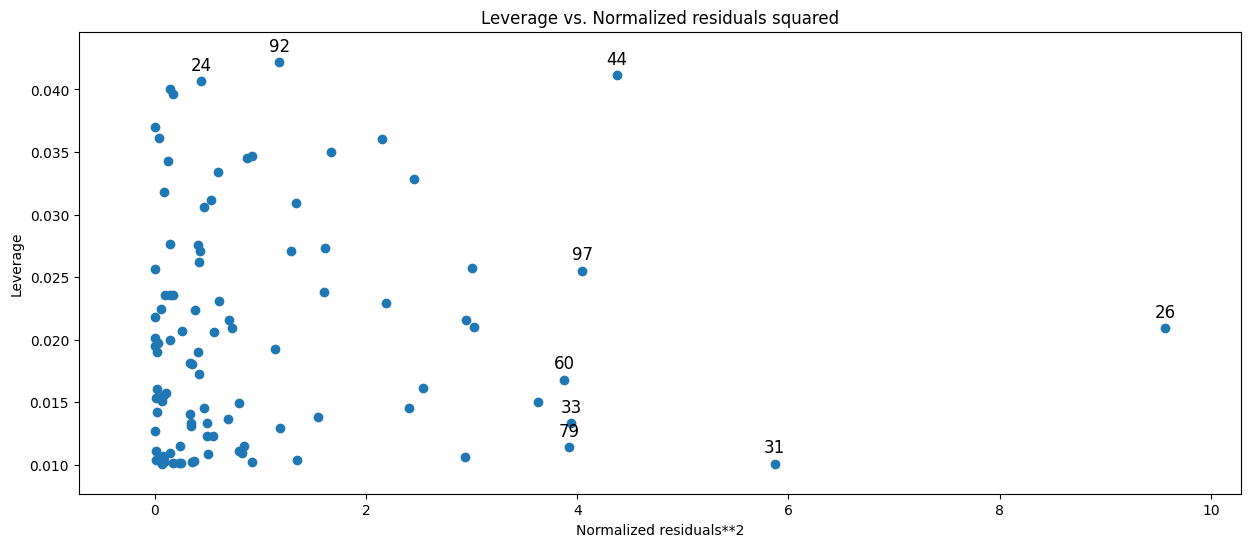

In [ ]:
fig,ax = plt.subplots(figsize=(15,6))
fig = plot_leverage_resid2(result5, ax=ax)

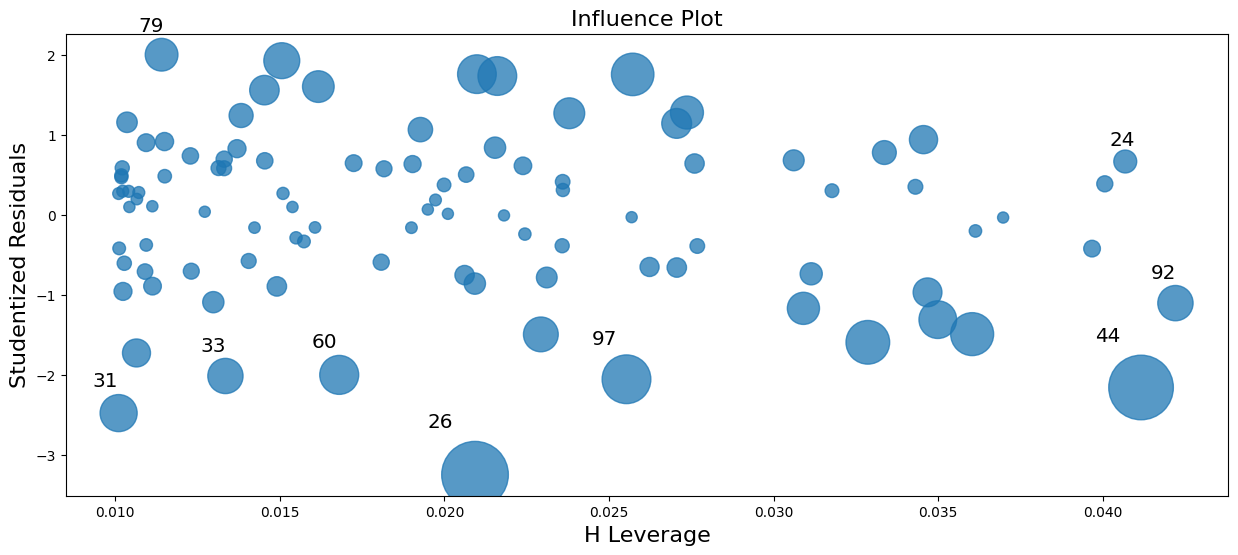

In [ ]:
fig,ax = plt.subplots(figsize= (15,6))
fig = influence_plot(result5, ax=ax)

--> no other outlier

In [ ]:
result5.params

Intercept   -0.673999
X5           5.155917
dtype: float64

In [ ]:
intercept5, slope5 = result5.params
df5['y_est'] = intercept5 + slope5 * X5

In [ ]:
df5

,Y,X,y_est
0,47.320319,9.0527,46.000971
1,39.862491,7.3135,37.033800
2,42.225779,8.6471,43.909731
3,30.010689,5.8579,29.528847
4,43.900459,7.9357,40.241812
...,...,...,...
95,34.299702,6.0058,30.291407
96,1.027913,0.9469,4.208139
97,33.965305,8.4148,42.712011
98,39.077962,6.6619,33.674205


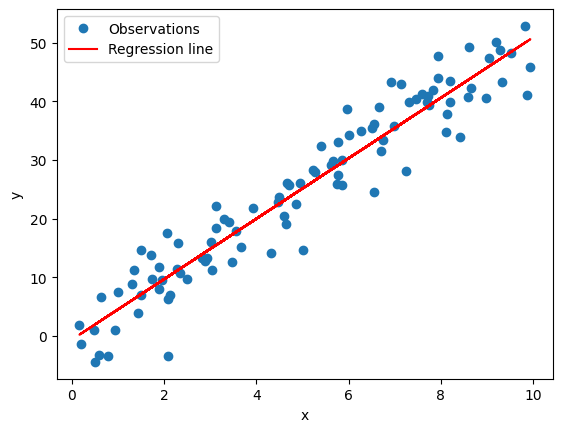

In [ ]:
# As you may notice, all the estimates lie on the line;
# this is the regression line

plt.plot(X5, Y5, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')

# Plot regression line
plt.plot(X5, df5.y_est, 'r-', label='Regression line')

# Add legend
plt.legend()
plt.show()

# **Set 6**

**Conclusion:**

*   Linear regression Model: We have estimated the intercept ( 𝛽0 ) to be approximately -0.02, and the slope ( 𝛽1 ) to be approximately 6.97. Thus, the equation for predicting y from the x can be written as:

$$\text{y} = -0.02 + 6.97 \cdot \text{x}$$

*   Comment: The linear assumptions were met for the original dataset after removing an outlier (no.101).

*   In the linear regression model, the intercept indicates that the dependent variable (y) will decrease by 0.02 units when the independent variable (x) is zero. The slope suggests that for each one-unit increase in the independent variable (x), the dependent variable (y) will increase by 6.97 units.

**Calculation, Code, and Plot:**

In [ ]:
df6.head()

,y,x
0,-2.764835,1.1290
1,61.065734,6.9100
2,52.854588,7.8374
3,-2.881062,0.1335
4,59.045448,9.2425


In [ ]:
df6.describe()

,y,x
count,101.000000,101.000000
mean,39.178208,5.618743
std,31.390864,4.268607
min,-6.757358,0.111800
25%,19.890518,2.539300
50%,39.493906,5.446000
75%,56.813645,8.108500
max,252.837897,35.783400


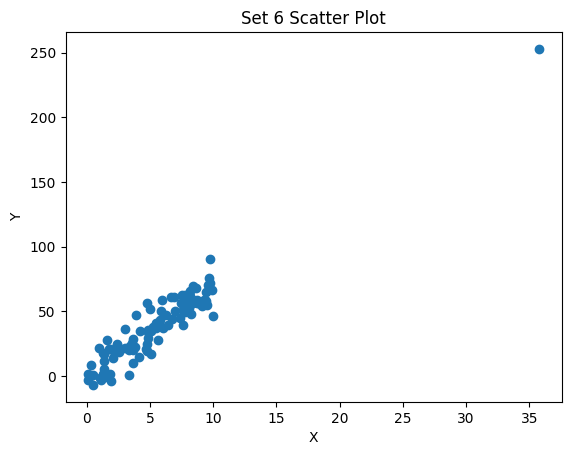

In [ ]:
Y6 = df6.y
X6 = df6.x

plt.scatter(X6, Y6)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Set 6 Scatter Plot')
plt.show()

In [ ]:
# Run the regression
result6 = sm.ols(formula='Y6 ~ X6', data=df6).fit()

# Show the results
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y6   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1041.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           2.49e-54
Time:                        02:52:00   Log-Likelihood:                -367.52
No. Observations:                 101   AIC:                             739.0
Df Residuals:                      99   BIC:                             744.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3059      1.534     -0.199      0.842      -3.350       2.739
X6             7.0272      0.218     32.259      0.000       6.595       7.459
==============================================================================
Omnibus:                        0.494   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.262
Skew:                           0.120   Prob(JB):                        0.877
Kurtosis:                       3.070   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

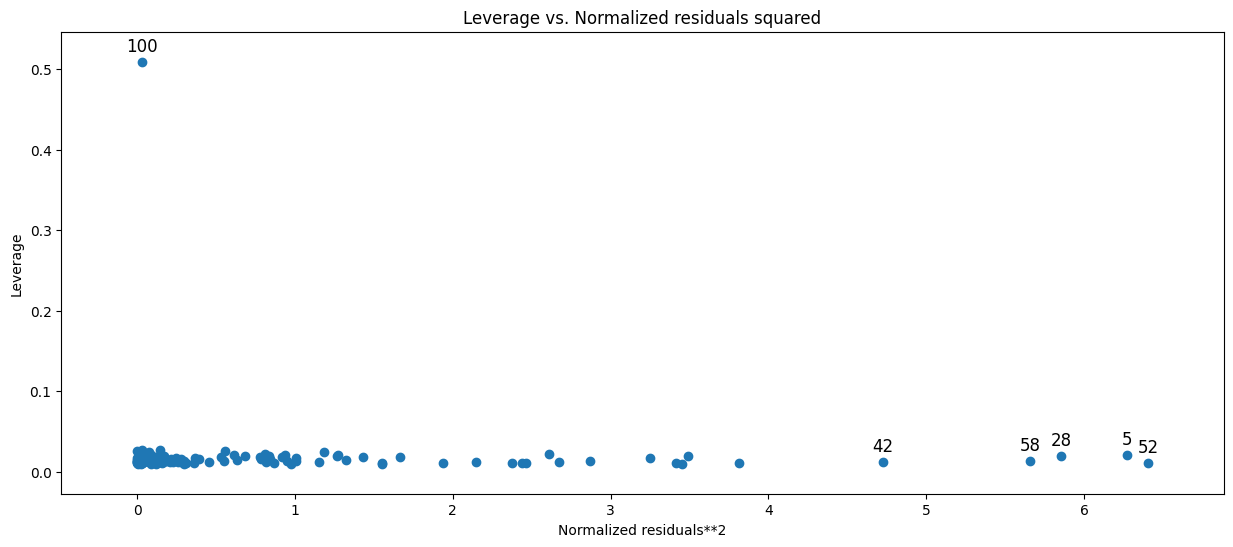

In [ ]:
fig,ax = plt.subplots(figsize=(15,6))
fig = plot_leverage_resid2(result6, ax=ax)

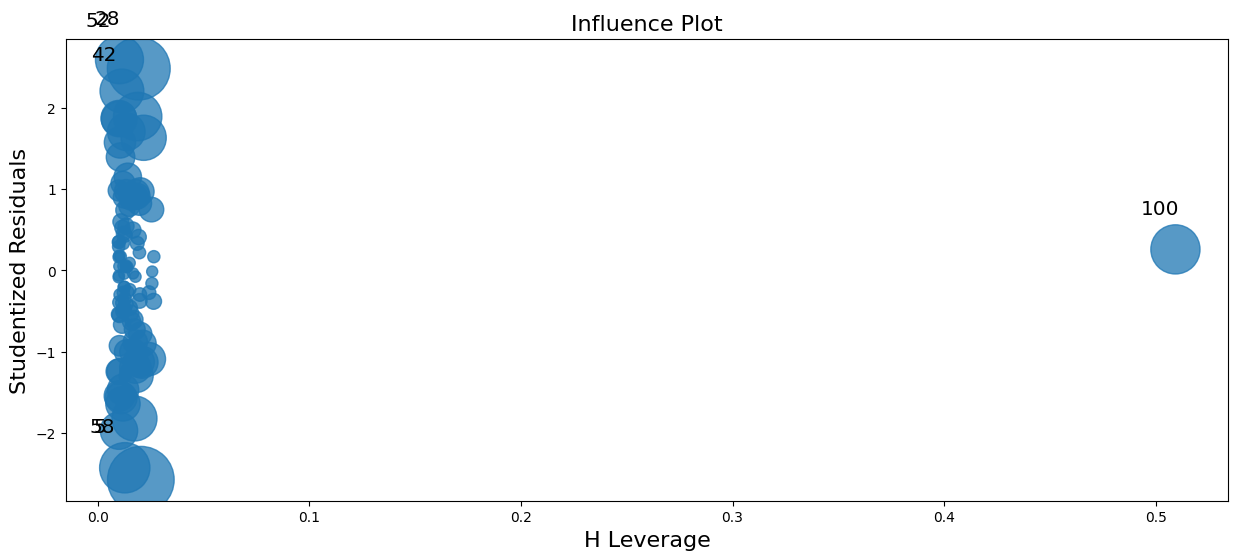

In [ ]:
fig,ax = plt.subplots(figsize= (15,6))
fig = influence_plot(result6, ax=ax)

--> remove 100

In [ ]:
df6.drop(df6.index[100], inplace=True)
df6

,y,x
0,-2.764835,1.1290
1,61.065734,6.9100
2,52.854588,7.8374
3,-2.881062,0.1335
4,59.045448,9.2425
...,...,...
95,57.886726,7.6842
96,56.695106,8.7167
97,70.342334,9.6165
98,20.791865,1.7477


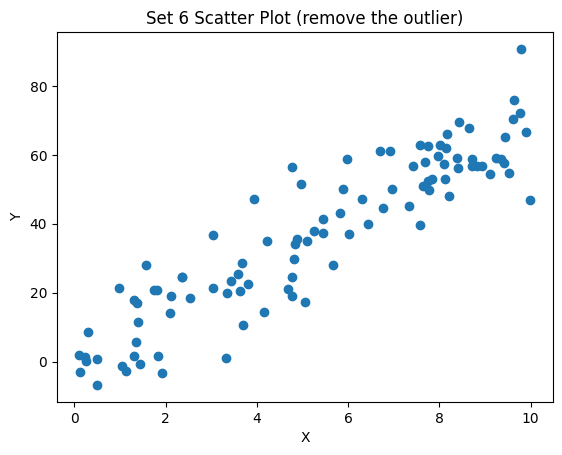

In [ ]:
Y6 = df6.y
X6 = df6.x

plt.scatter(X6, Y6)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Set 6 Scatter Plot (remove the outlier)')
plt.show()

In [ ]:
# Run the regression
result6 = sm.ols(formula='Y6 ~ X6', data=df6).fit()

# Show the results
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y6   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     502.7
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           2.29e-40
Time:                        02:52:01   Log-Likelihood:                -364.34
No. Observations:                 100   AIC:                             732.7
Df Residuals:                      98   BIC:                             737.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0203      1.899     -0.011      0.991      -3.788       3.748
X6             6.9703      0.311     22.420      0.000       6.353       7.587
==============================================================================
Omnibus:                        0.459   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.795   Jarque-Bera (JB):                0.261
Skew:                           0.123   Prob(JB):                        0.877
Kurtosis:                       3.044   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

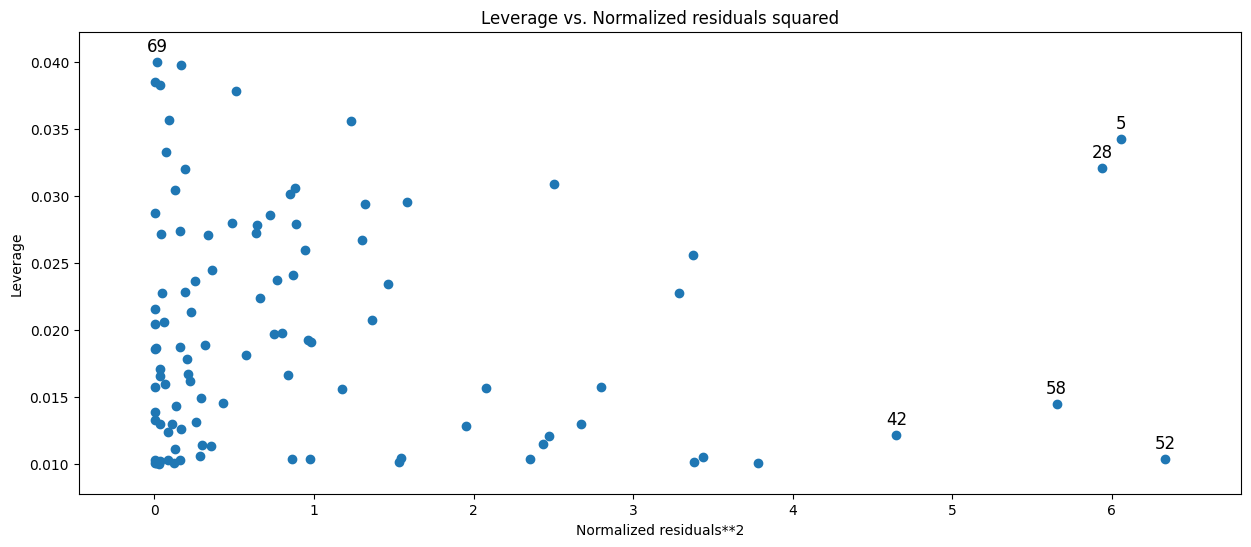

In [ ]:
fig,ax = plt.subplots(figsize=(15,6))
fig = plot_leverage_resid2(result6, ax=ax)

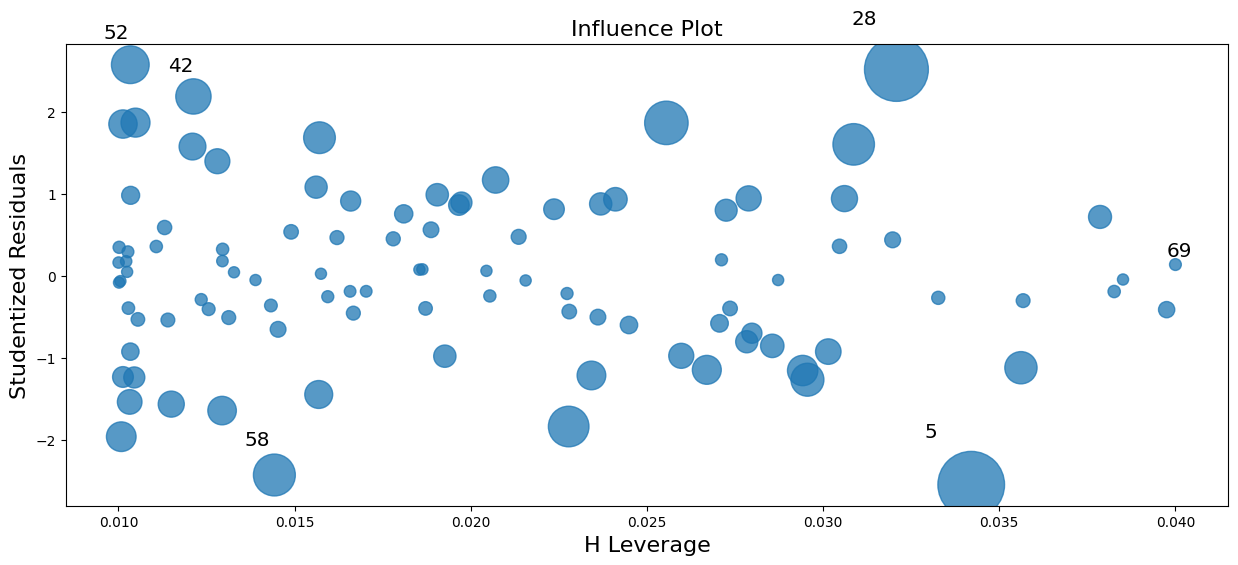

In [ ]:
fig,ax = plt.subplots(figsize= (15,6))
fig = influence_plot(result6, ax=ax)

--> no other outlier

In [ ]:
result6.params

Intercept   -0.020325
X6           6.970334
dtype: float64

In [ ]:
intercept6, slope6 = result6.params
df6['y_est'] = intercept6 + slope6 * X6

In [ ]:
df6

,y,x,y_est
0,-2.764835,1.1290,7.849183
1,61.065734,6.9100,48.144684
2,52.854588,7.8374,54.608972
3,-2.881062,0.1335,0.910215
4,59.045448,9.2425,64.402988
...,...,...,...
95,57.886726,7.6842,53.541117
96,56.695106,8.7167,60.737987
97,70.342334,9.6165,67.009893
98,20.791865,1.7477,12.161728


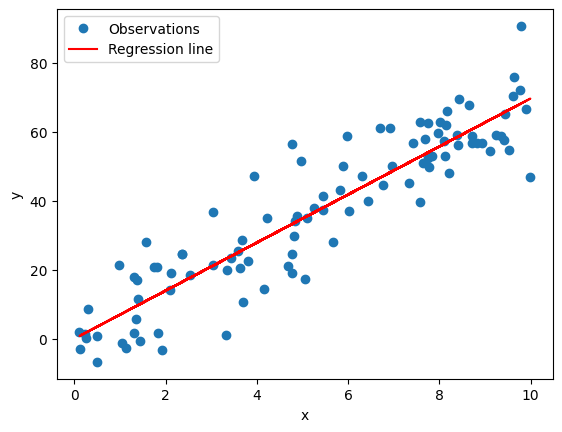

In [ ]:
# As you may notice, all the estimates lie on the line;
# this is the regression line

plt.plot(X6, Y6, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')

# Plot regression line
plt.plot(X6, df6.y_est, 'r-', label='Regression line')

# Add legend
plt.legend()
plt.show()